## Observations and Insights

1.) Capomulin and Ramicane proved to be the most effective drug regimens for regulating the tumor volumes in the test mice.
2.) Capomulin and Ramicane were also the most utilized drugs for number of data points during the testing period.
3.) All of the other drugs other than Capomulin and Ramicane performed only nominally or even less effective than the placebo for treating the tumor volumes in the test mice.


## Dependencies and starter code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_mergedf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

mouse_mergedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Store the Average,Median, Variance, and Standard Deviations of the Tumor Volume Data Grouped by Drug and Timepoint

 

mean_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean().round(2)
median_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].median().round(2)
var_tumor_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].var().round(2)
stdev_tumor_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].std().round(2)
std_error_tumor_volume = mouse_mergedf.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem().round(2)




combined= pd.DataFrame({"Mean": mean_volume, "Median": median_volume, "Variance":var_tumor_volume ,"Standard Deviation" : stdev_tumor_volume, "SEM" : std_error_tumor_volume})

combined

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

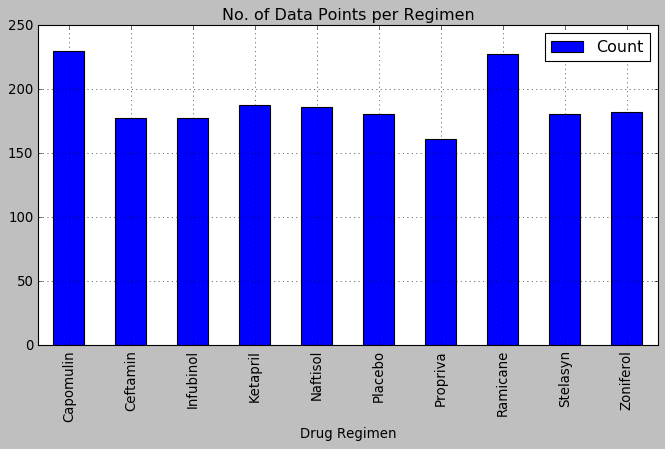

In [8]:

# Generate a bar plot showing the number of data points for each treatment regimen using pandas
grouped_datadf = pd.DataFrame(mouse_mergedf.groupby(["Drug Regimen"]).count()).reset_index()

# Filter the DataFrame down only to those columns to chart
regimen_datapointsdf = grouped_datadf[["Drug Regimen","Mouse ID"]]
regimen_datapointsdf = regimen_datapointsdf.rename(columns={"Mouse ID": "Count"})

# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapointsdf = regimen_datapointsdf.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapointsdf.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("No. of Data Points per Regimen")
plt.style.use('classic')
plt.grid(zorder=0)
plt.show()

Text(0.5, 1.0, 'No. of Data Points per Regimen')

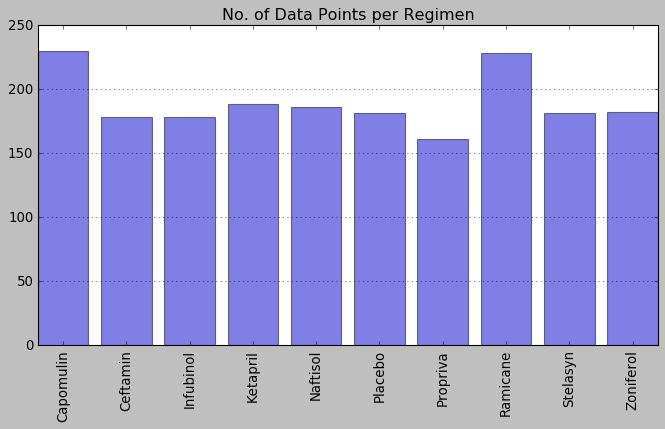

In [9]:
# Generate a bar plot showing the number of data points for each treatment regimen using pyplot
regimens = combined.index.tolist()
regimen_ct = (mouse_mergedf.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(regimen_ct))
# Define the x-axis
x_axis = regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,5))
plt.bar(x_axis, regimen_ct, color='mediumblue', alpha=0.5, align="center")
plt.grid(b=None, which='major', axis='y')
plt.xticks(rotation=90)



plt.title('No. of Data Points per Regimen')

## Pie plots

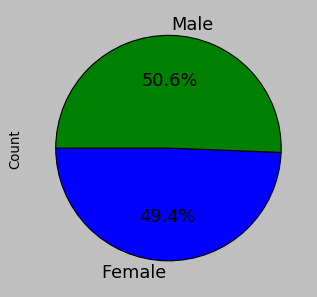

In [10]:


# Generate a pie plot showing the distribution of female versus male mice using pandas
genders_df = pd.DataFrame(mouse_mergedf.groupby(["Sex"]).count()).reset_index()


# Filter the DataFrame down only to those columns wanting to  chart
genders_df = genders_df[["Sex","Mouse ID"]]
genders_df = genders_df.rename(columns={"Mouse ID": "Count"})

# plot the chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
genders_df.plot.pie(y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=genders_df['Sex'], legend = False, fontsize=16)


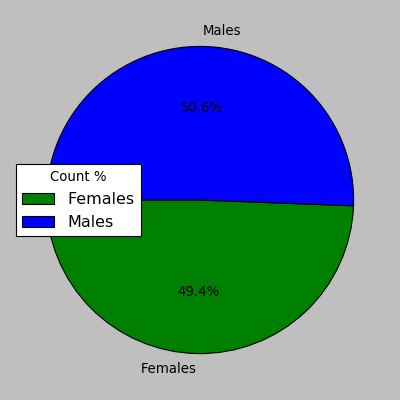

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_femaledf= (mouse_mergedf.groupby(["Sex"])["Mouse ID"].count())

labels = ["Females", "Males"]

colors = ["green", "blue"]

plt.pie(male_femaledf, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.legend(title="Count %",
           loc=6)


## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and 
# quantitatively determine if there are any potential outliers.

maximum_df = mouse_mergedf.loc[mouse_mergedf["Timepoint"] == 45]
capdrug_data_df = maximum_df[maximum_df['Drug Regimen'].isin(['Capomulin'])]
capdrug_sizes = capdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
capdrug_sizes = capdrug_sizes["Tumor Volume (mm3)"]
capdrug_sizes

19     23.343598
39     28.430964
29     28.484033
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
224    36.041047
244    37.074024
204    37.311846
337    38.125164
282    38.846876
299    38.939633
309    38.982878
360    40.159220
350    40.658124
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = capdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 32.37735684
The upper quartile of the volumes is: 40.1592203
The interquartile range of the volumes is: 7.781863460000004
The the median of the volumes is: 37.31184577 
Values that are below 20.70456164999999 could be outliers.
Values that are above 51.83201549 could be outliers.


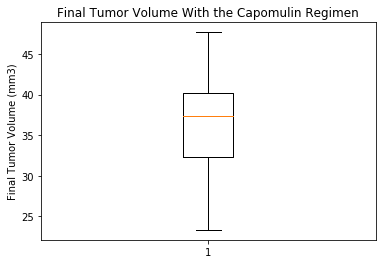

In [57]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capdrug_sizes)
plt.show()

In [15]:
# List the final tumor volumes
maximum_df = mouse_mergedf.loc[mouse_mergedf["Timepoint"] == 45]
ramdrug_data_df = maximum_df[maximum_df['Drug Regimen'].isin(['Ramicane'])]
ramdrug_sizes = ramdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
ramdrug_sizes = ramdrug_sizes["Tumor Volume (mm3)"]
ramdrug_sizes

9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
114    31.095335
94     31.560470
174    32.978522
154    33.397653
184    33.562402
194    36.134852
254    36.374510
234    37.225650
272    37.311236
327    38.407618
214    38.810366
400    40.659006
410    40.667713
430    43.047543
420    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ramdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 30.981175224999998
The upper quartile of the volumes is: 38.508305307499995
The interquartile range of the volumes is: 7.527130082499998
The the median of the volumes is: 34.848627300000004 
Values that are below 19.690480101250003 could be outliers.
Values that are above 49.79900043124999 could be outliers.


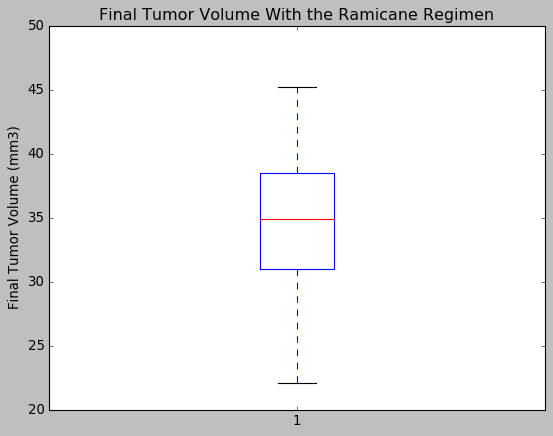

In [17]:
# Make the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramdrug_sizes)
plt.show()

In [18]:
# List the Final Tumor Volumes
maximum_df = mouse_mergedf.loc[mouse_mergedf["Timepoint"] == 45]
capdrug_data_df = maximum_df[maximum_df['Drug Regimen'].isin(['Capomulin'])]
capdrug_sizes = capdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
capdrug_sizes = capdrug_sizes["Tumor Volume (mm3)"]
capdrug_sizes

19     23.343598
39     28.430964
29     28.484033
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
224    36.041047
244    37.074024
204    37.311846
337    38.125164
282    38.846876
299    38.939633
309    38.982878
360    40.159220
350    40.658124
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = ramdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 30.981175224999998
The upper quartile of the volumes is: 38.508305307499995
The interquartile range of the volumes is: 7.527130082499998
The the median of the volumes is: 34.848627300000004 
Values that are below 19.690480101250003 could be outliers.
Values that are above 49.79900043124999 could be outliers.


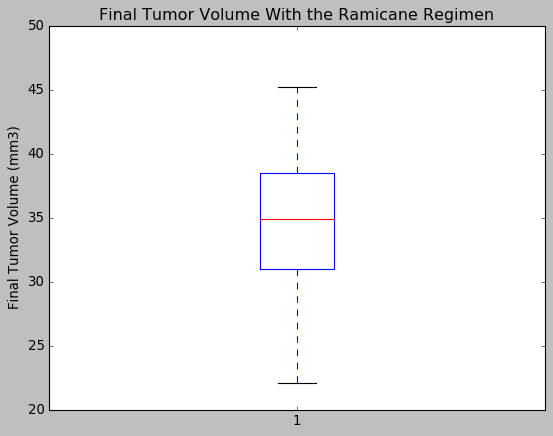

In [20]:
# Make the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramdrug_sizes)
plt.show()

In [21]:
# List the final tumor volumes
maximum_df = mouse_mergedf.loc[mouse_mergedf["Timepoint"] == 45]
infdrug_data_df = maximum_df[maximum_df['Drug Regimen'].isin(['Infubinol'])]
infdrug_sizes = infdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
infdrug_sizes = infdrug_sizes["Tumor Volume (mm3)"]
infdrug_sizes

834     60.918767
800     62.435404
1872    62.754451
473     65.525743
540     66.083066
1053    66.196912
1813    67.685569
463     67.973419
637     72.226731
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = infdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the volumes is: {lowerq}")
print(f"The upper quartile of the volumes is: {upperq}")
print(f"The interquartile range of the volumes is: {iqr}")
print(f"The the median of the volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the volumes is: 62.75445141
The upper quartile of the volumes is: 67.68556862
The interquartile range of the volumes is: 4.9311172099999965
The the median of the volumes is: 66.08306589 
Values that are below 55.35777559500001 could be outliers.
Values that are above 75.08224443499999 could be outliers.


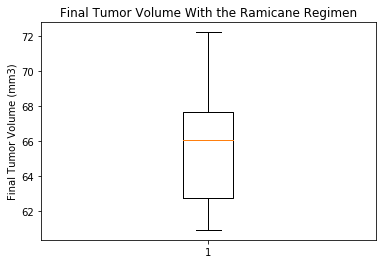

In [64]:
# Make the boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infdrug_sizes)
plt.show()

In [23]:
# List the final tumor volumes
maximum_df = mouse_mergedf.loc[mouse_mergedf["Timepoint"] == 45]
cefdrug_data_df = maximum_df[maximum_df['Drug Regimen'].isin(['Ceftamin'])]
cefdrug_sizes = cefdrug_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
cefdrug_sizes = cefdrug_sizes["Tumor Volume (mm3)"]
cefdrug_sizes

1260    59.741901
1132    59.851956
1797    61.386660
1379    61.433892
993     61.849023
493     62.999356
1162    64.299830
1773    64.634949
1855    64.729837
1670    67.527482
1112    67.748662
1845    68.594745
1033    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cefdrug_sizes.quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print the quartiles, median, and outliers
print(f"The lower quartile of the temperatures is: {lowerq}")
print(f"The upper quartile of the temperatures is: {upperq}")
print(f"The interquartile range of the temperatures is: {iqr}")
print(f"The the median of the temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values that are below {lower_bound} could be outliers.")
print(f"Values that are above {upper_bound} could be outliers.")

The lower quartile of the temperatures is: 61.43389223
The upper quartile of the temperatures is: 67.52748237
The interquartile range of the temperatures is: 6.093590140000003
The the median of the temperatures is: 64.29983003 
Values that are below 52.29350701999999 could be outliers.
Values that are above 76.66786758 could be outliers.


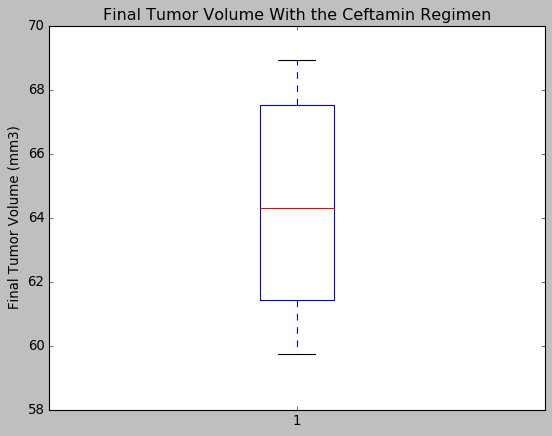

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume With the Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cefdrug_sizes)
plt.show()

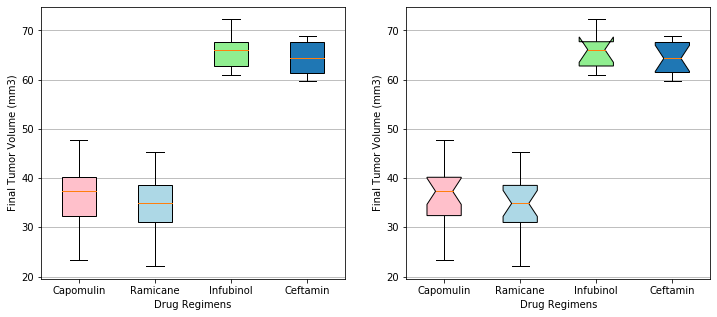

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

import matplotlib.pyplot as plt
import numpy as np

# Input drug data

all_data = [capdrug_sizes, ramdrug_sizes, infdrug_sizes, cefdrug_sizes]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('Drug Regimens')
    ax.set_ylabel('Final Tumor Volume (mm3)')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and scatter plots

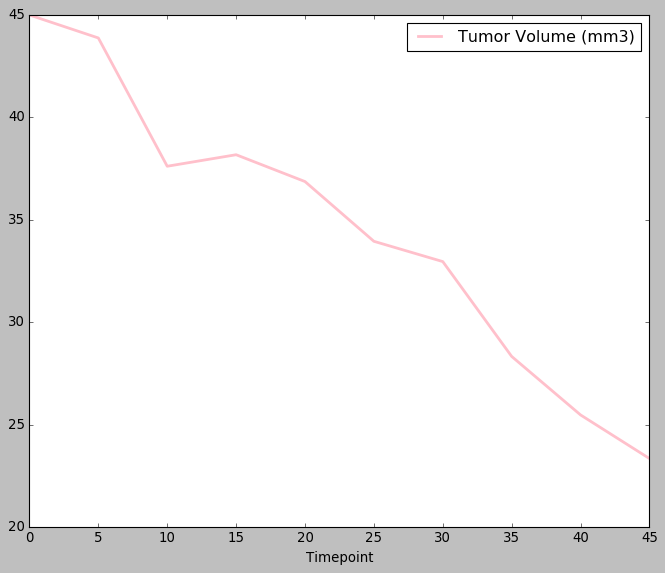

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
import pandas as pd
# Create a new DataFrame that looks into Capomulin
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Merge the mouse and drug data
mouse_mergedf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
capomulin_df = mouse_mergedf.loc[mouse_mergedf["Drug Regimen"] == "Capomulin"]
cap_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]


# Select the 2 columns needed
cap_mouse_df = cap_mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='pink')

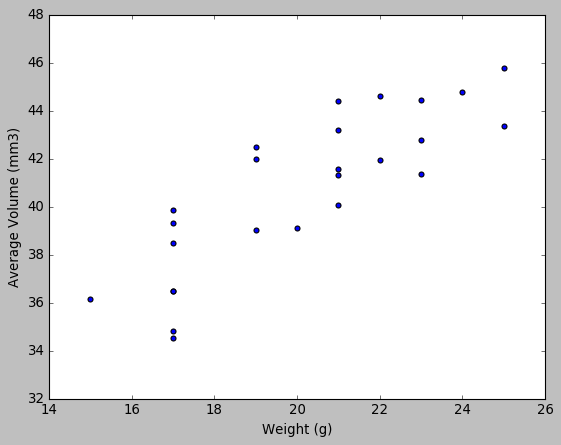

In [80]:
# Generate a scatter plot of the mouse weight versus average tumor volume for the Capomulin regimen
cap_df = mouse_mergedf.loc[mouse_mergedf["Drug Regimen"] == "Capomulin"]


avg_cap = pd.DataFrame(cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index() 
# Rename  the Tumor Volume column
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})

# Set the 'Mouse ID' as the index
avg_cap = avg_cap.set_index('Mouse ID')



# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = avg_cap['Weight (g)']
y_values = avg_cap["Average Volume"]
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

In [76]:
# Calculate the correlation coefficient and linear regression model for the mouse weight and average tumor volume for the Capomulin regimen

from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Calculate the correlation coefficient between the mouse weight and the average tumor volume for the Capomulin regimen

mouse_weight = avg_cap.iloc[:,0]
avg_tumor_volume = avg_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
correlation

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


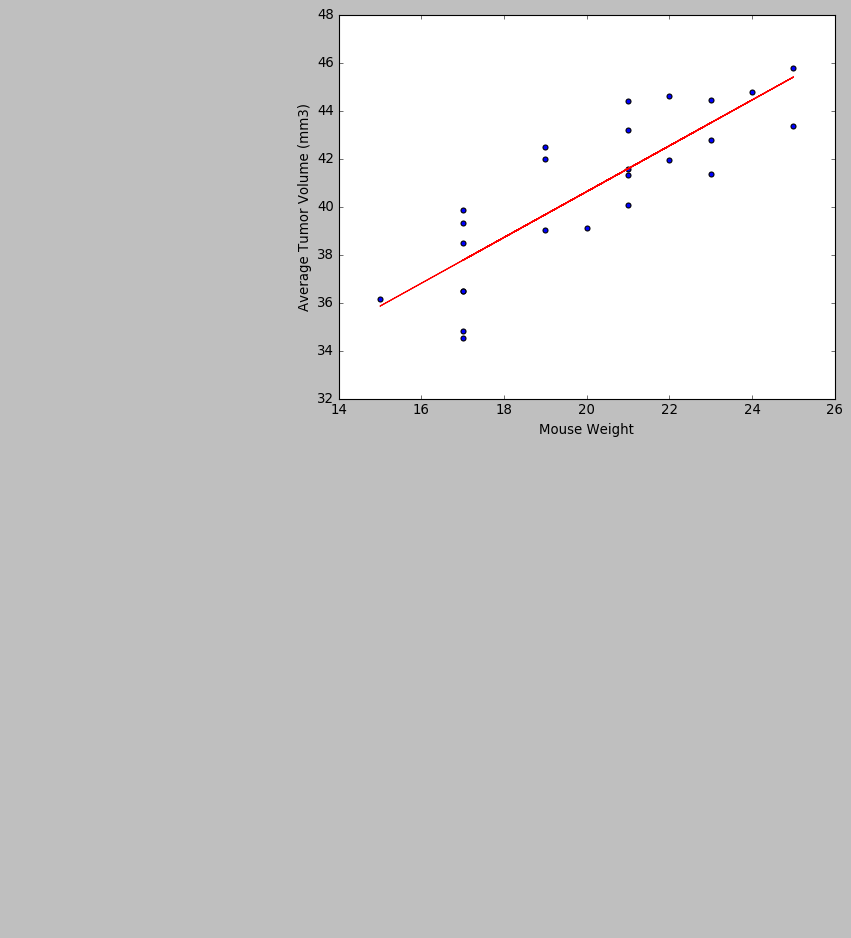

In [81]:

# Add the linear regression equation and line to plot
x_values = avg_cap['Weight (g)']
y_values = avg_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()